In [1]:
import numpy as np
from Util.pyDialogue import askFILES, askDIR, askFILE
from skimage.io import imread
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
img = np.load(askFILE())
img.shape

(30, 2594, 2594)

In [96]:
Hara = img[1:27,...]
Hara = Hara.reshape((26,Hara.shape[1]*Hara.shape[2]))
Hara = Hara.swapaxes(0,1)
Hara.shape

(6728836, 26)

In [97]:
clustering = KMeans(n_clusters=4, random_state=42, n_init=20)
fit_predict = clustering.fit_predict(Hara)

In [98]:
mask = fit_predict.reshape((img.shape[1],img.shape[2]))

In [99]:
np.unique(mask)

array([0, 1, 2, 3])

In [111]:
masked = np.where(mask == 1, 0,1)

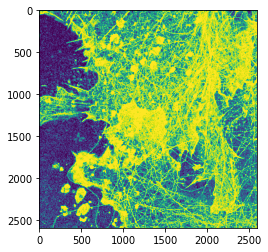

In [112]:
plt.imshow(masked)

In [102]:
Hara2 = np.where(mask == 0, img[1:27], 0)

In [103]:
Hara2 = Hara2.reshape((26,Hara2.shape[1]*Hara2.shape[2]))
Hara2 = Hara2.swapaxes(0,1)
Hara2.shape

(6728836, 26)

In [104]:
clustering = KMeans(n_clusters=3, random_state=42, n_init=20)
fit_predict = clustering.fit_predict(Hara2)

In [105]:
mask2 = fit_predict.reshape((img.shape[1],img.shape[2]))
masked2 = np.where(mask2 == 0, 0,1)

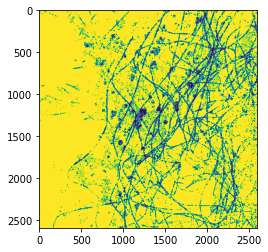

In [106]:
v

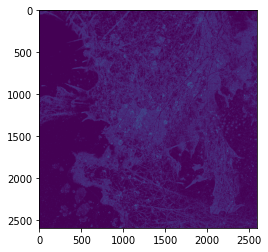

In [68]:
plt.imshow(Hara2[3,...])

## Let's just try 2 structures

In [12]:
Hara_stack = np.dstack([imread(file) for file in askFILES()])
Hara_stack.shape # 6069_50Hz_1_grey - 2019_10_16__adipocytes__L608__647__102_grey

(2647, 2647, 26)

In [3]:
gt_img = np.dstack([imread(file)[:2647,:2647] for file in askFILES()])
gt_img.shape

(2647, 2647, 2)

In [6]:
gt_img_comb = (gt_img[...,0]+gt_img[...,1])
gt_img_comb = gt_img_comb/np.max(gt_img_comb)

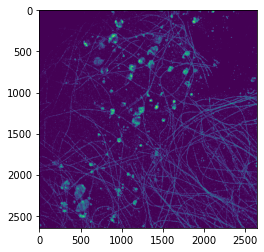

In [7]:
plt.imshow(gt_img_comb)

In [8]:
Hara_stack = Hara_stack.reshape((Hara_stack.shape[0]*Hara_stack.shape[1], 26))
Hara_stack.shape

(7006609, 26)

In [9]:
clustering = KMeans(n_clusters=5, random_state=0, n_init=100)
Hara_stack_fit_predict = clustering.fit_predict(Hara_stack)

(2647, 2647, 30)


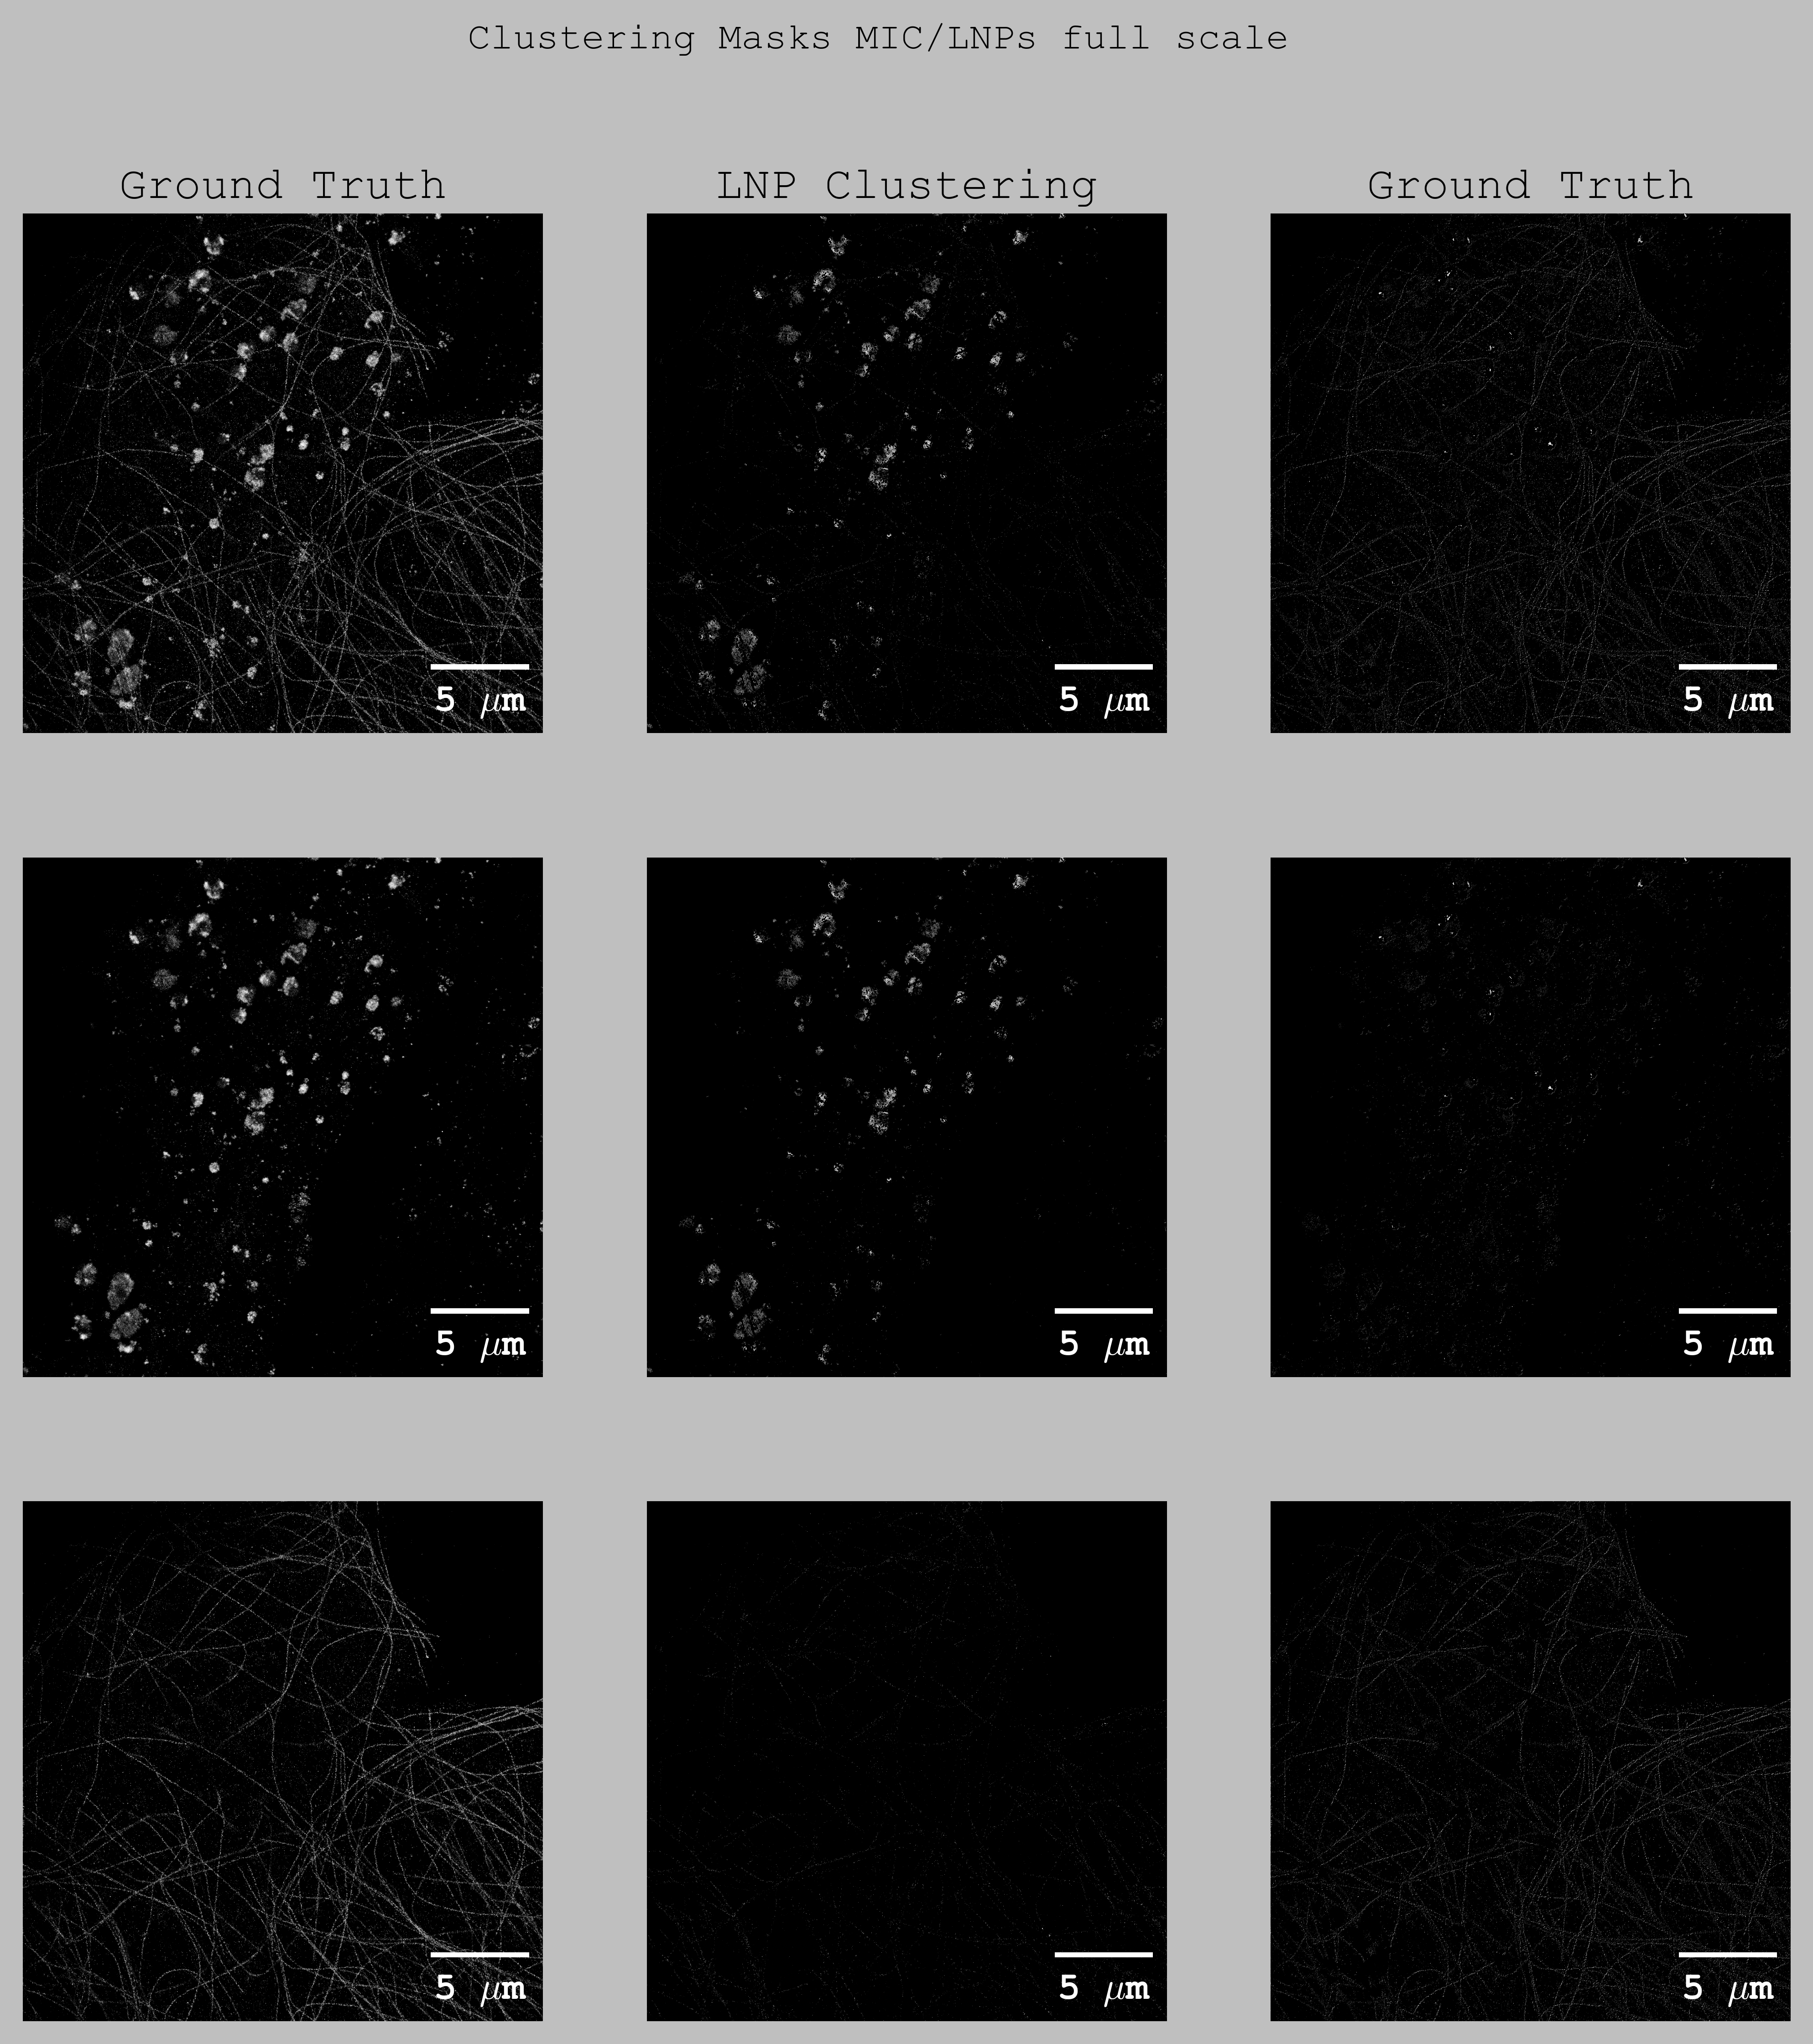

In [5]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from Util.pyDialogue import askFILE
from matplotlib_scalebar.scalebar import ScaleBar

im_stack = np.load(askFILE())
print(im_stack.shape)
plt.style.use('classic')
font = {'family' : 'Courier new',
        'weight' : 'bold',
        'size'   : 12}
colormap = 'gray'
matplotlib.rc('font', **font)
    
fig, ax = plt.subplots(3,3,figsize = (10,10), dpi = 500)
plt.suptitle('Clustering Masks MIC/LNPs full scale', font = font)

for a in ax:
    for b in a:
        b.axis('off')
        b.add_artist(ScaleBar(10, units='nm', location = 'lower right', frameon=0, color = 'w'))

ax[0][0].set_title(f'Ground Truth')
ax[0][0].imshow(im_stack[...,0], cmap=colormap)
ax[1][0].imshow(im_stack[...,1], cmap=colormap)
ax[2][0].imshow(im_stack[...,2], cmap=colormap)

ax[0][1].set_title(f'LNP Clustering')
ax[0][1].imshow(np.where(im_stack[...,-1] == 3, 1,0) * im_stack[...,0], cmap=colormap)
ax[1][1].imshow(np.where(im_stack[...,-1] == 3, 1,0) * im_stack[...,1], cmap=colormap)
ax[2][1].imshow(np.where(im_stack[...,-1] == 3, 1,0) * im_stack[...,2], cmap=colormap)

ax[0][2].set_title(f'Ground Truth')
ax[0][2].imshow(np.where(im_stack[...,-1] == 0, 1,0) * im_stack[...,0], cmap=colormap)
ax[1][2].imshow(np.where(im_stack[...,-1] == 0, 1,0) * im_stack[...,1], cmap=colormap)
ax[2][2].imshow(np.where(im_stack[...,-1] == 0, 1,0) * im_stack[...,2], cmap=colormap)

plt.show()

In [27]:
im_stack[...,0] = im_stack[...,0]/np.max(im_stack[...,0]) *255

cluster_1 = np.where(im_stack[...,-1] == 0, 1,0) * im_stack[...,0] # comb -> MIC
cluster_1 = (cluster_1/np.max(cluster_1) * 255).astype('uint8')

cluster_2 = np.where(im_stack[...,-1] == 3, 1,0) * im_stack[...,0]# comb -> LNp
cluster_2 = (cluster_2/np.max(cluster_2) * 255).astype('uint8')

cluster_3 = np.where(im_stack[...,-1] == 0, 1,0) * im_stack[...,2]# MIC -> MIC
cluster_3 = (cluster_3/np.max(cluster_3) * 255).astype('uint8')

cluster_4 = np.where(im_stack[...,-1] == 3, 1,0) * im_stack[...,2]# MIC -> LNP
cluster_4 = (cluster_4/np.max(cluster_4) * 255).astype('uint8')

cluster_5 = np.where(im_stack[...,-1] == 0, 1,0) * im_stack[...,1]# LNP -> MIC
cluster_5 = (cluster_5/np.max(cluster_5) * 255).astype('uint8')

cluster_6 = np.where(im_stack[...,-1] == 3, 1,0) * im_stack[...,1]# LNP -> LNP
cluster_6 = (cluster_6/np.max(cluster_6) * 255).astype('uint8')

for_eval = np.dstack([im_stack[...,0], im_stack[...,0], im_stack[...,2], np.zeros_like(im_stack[...,2]), np.zeros_like(im_stack[...,2]), im_stack[...,1], cluster_1, cluster_2, cluster_3, cluster_4, cluster_5, cluster_6])
for_eval.shape

(2647, 2647, 12)

In [28]:
np.save('./Hara_cluster_for_eval.npy', for_eval.astype('uint8'))

In [ ]:
#mask_Hara_stack = Hara_stack_fit_predict.reshape((2647,2647))

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from Util.pyDialogue import askFILE
from matplotlib_scalebar.scalebar import ScaleBar

im_stack = np.load(askFILE())
print(im_stack.shape)

plt.style.use('dark_background')
font = {'family' : 'Courier new',
        'weight' : 'bold',
        'size'   : 8}
matplotlib.rc('font', **font)

fig, ax = plt.subplots(4,6,figsize = (8,5), dpi = 300)
plt.suptitle('Clustering Masks MIC/LNPs')

for a in ax:
    for b in a:
        b.axis('off')
        b.add_artist(ScaleBar(10, units='nm', location = 'lower right', frameon=0, color = 'w', pad = 0 ,font_properties = {'family' : 'Courier new','weight' : 'bold','size'   : 5} ))

ax[0][0].set_title(f'Ground Truth')
ax[0][0].imshow(im_stack[...,0], cmap='plasma')
ax[1][0].imshow(im_stack[...,1], cmap='plasma')
ax[2][0].imshow(im_stack[...,2], cmap='plasma')
ax[3][0].imshow(np.zeros_like(im_stack[...,0]), cmap='plasma')

for j in range(0,5):
    ax[0][j+1].set_title(f'Cluster #{j}')
    ax[0][j+1].imshow(np.where(im_stack[...,-1] == j, 1,0) * im_stack[...,0], cmap='plasma')
    ax[1][j+1].imshow(np.where(im_stack[...,-1] == j, 1,0) * im_stack[...,1], cmap='plasma')
    ax[2][j+1].imshow(np.where(im_stack[...,-1] == j, 1,0) * im_stack[...,2], cmap='plasma')
    ax[3][j+1].imshow(np.where(im_stack[...,-1] == j, 1,0), cmap='plasma')

(2647, 2647, 30)


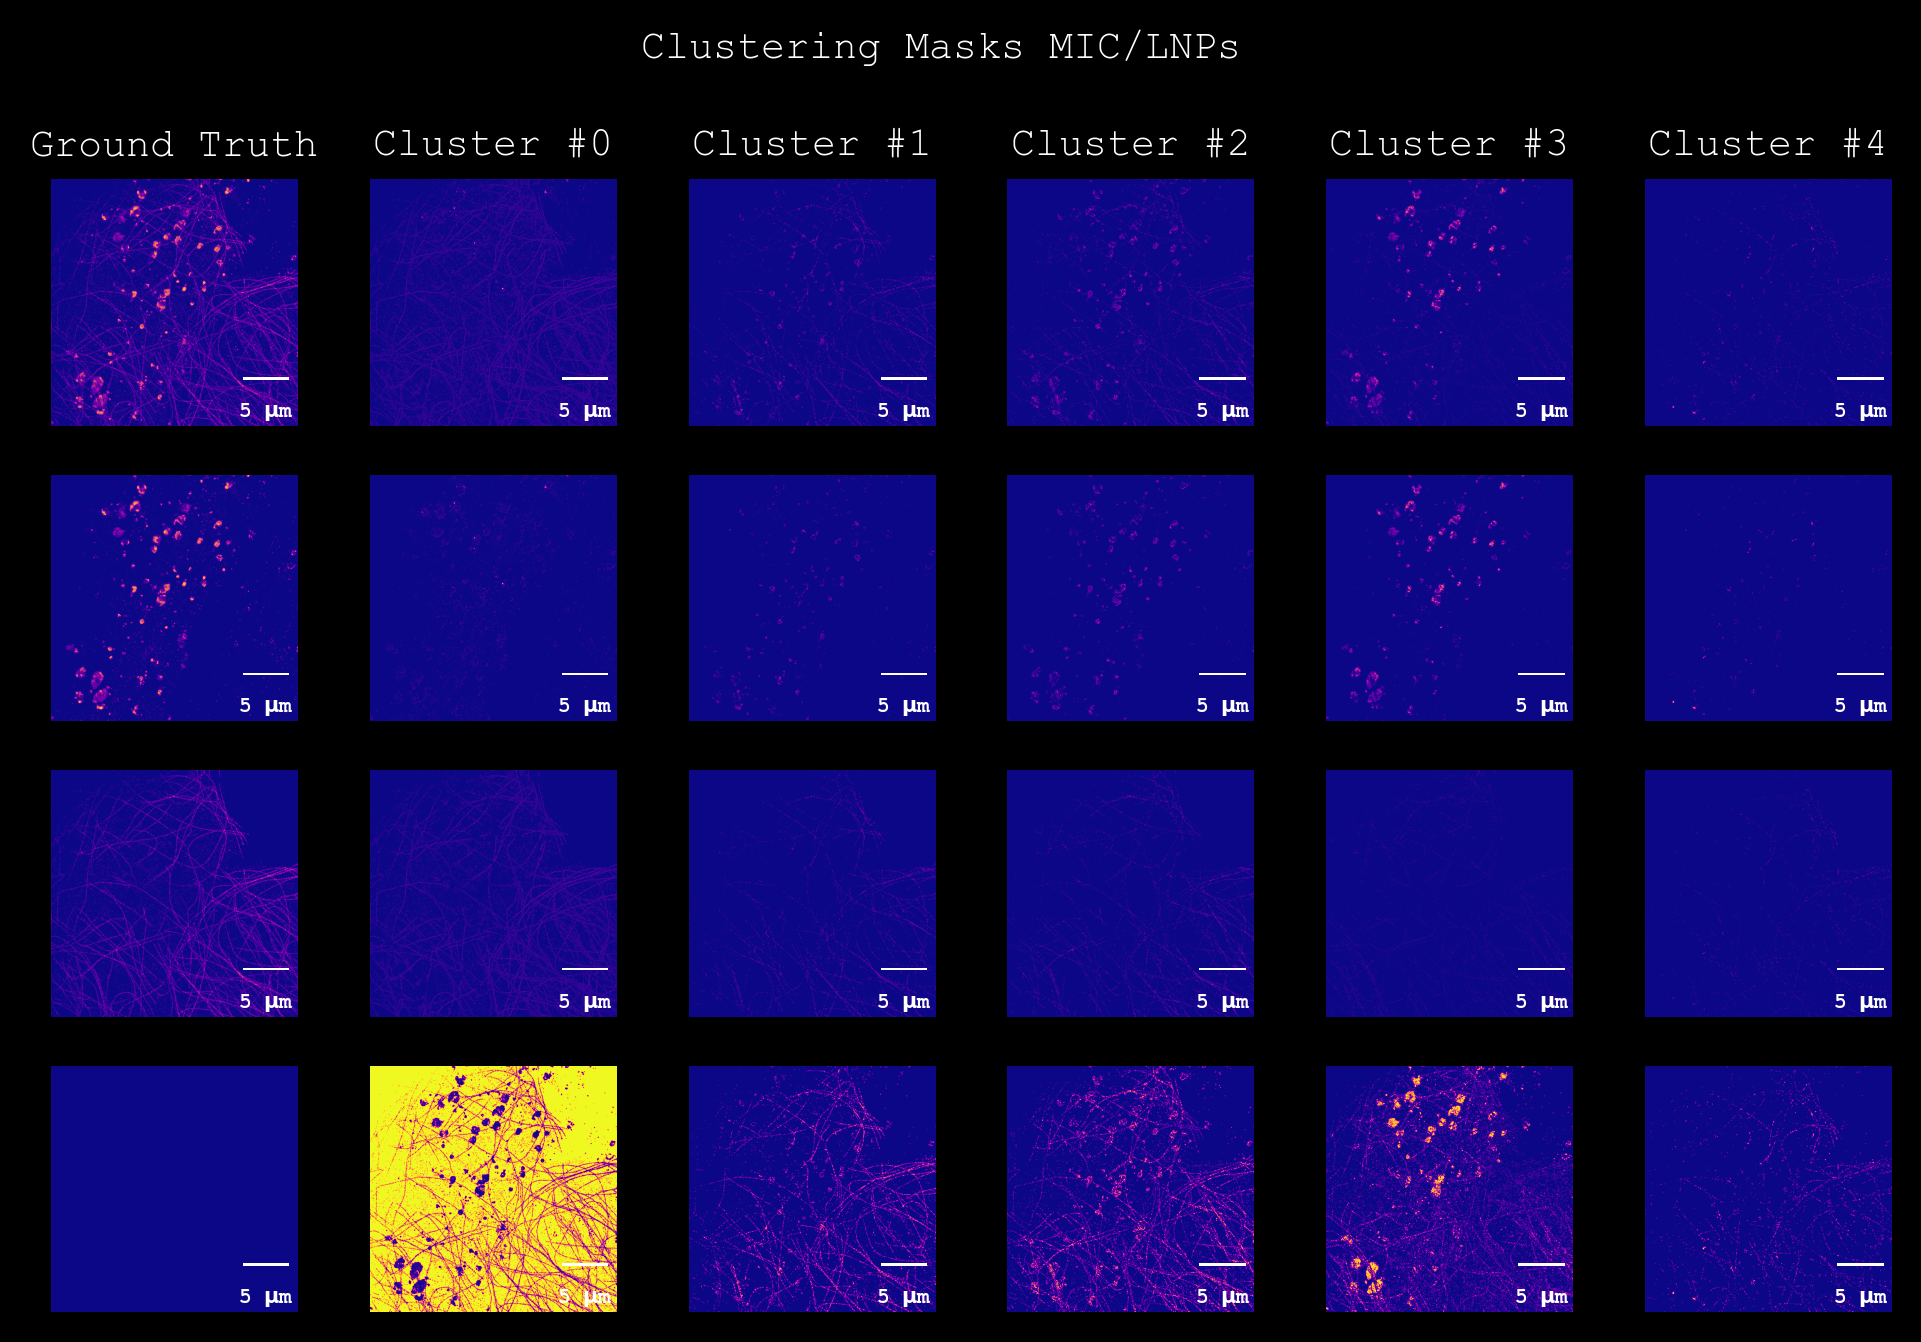

In [13]:
mask_Hara_stack = Hara_stack_fit_predict.reshape((2647,2647))

plt.style.use('dark_background')

fig, ax = plt.subplots(4,6,figsize = (8,5), dpi = 300)
plt.suptitle('Clustering Masks MIC/LNPs')

for a in ax:
    for b in a:
        b.axis('off')

ax[0][0].set_title(f'Ground Truth')
ax[0][0].imshow(gt_img_comb)
ax[1][0].imshow(gt_img[...,0])
ax[2][0].imshow(gt_img[...,1])
ax[3][0].imshow(np.zeros_like(gt_img[...,0]))

for j in range(0,5):
    ax[0][j+1].set_title(f'Cluster #{j}')
    ax[0][j+1].imshow(np.where(mask_Hara_stack == j, 1,0) * gt_img_comb)
    ax[1][j+1].imshow(np.where(mask_Hara_stack == j, 1,0) * gt_img[...,0])
    ax[2][j+1].imshow(np.where(mask_Hara_stack == j, 1,0) * gt_img[...,1])
    ax[3][j+1].imshow(np.where(mask_Hara_stack == j, 1,0))

In [13]:
hara_cluster = np.dstack([gt_img_comb, gt_img, Hara_stack, mask_Hara_stack])
np.save('./GT_hara_cluster.npy', hara_cluster)

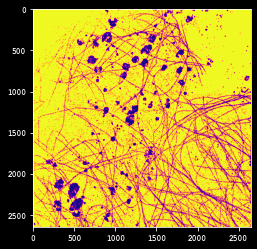

In [12]:
mask_Hara_stack = im_stack[...,-1]#Hara_stack_fit_predict.reshape((2647,2647))
mask_Hara_stack = np.where(mask_Hara_stack == 0, 1,0)
plt.imshow(mask_Hara_stack, cmap = 'plasma')

In [3]:
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.cluster import DBSCAN

In [6]:
# Fit the GMM model
gmm = GaussianMixture(n_components=3, n_init=5, random_state=0)
# Fit and predict on the data
y_gmm = gmm.fit_predict(Hara_stack)

In [22]:
mask_y_gmm = y_gmm.reshape((2647,2647))
mask_y_gmm = np.where(mask_y_gmm == 1, 1,0)

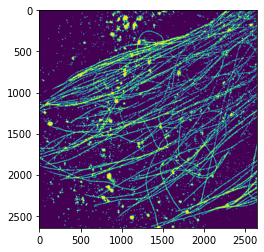

In [23]:
plt.imshow(mask_y_gmm)

In [19]:
mask_Hara_stack = Hara_stack_fit_predict.reshape((2647,2647))
mask_Hara_stack = np.where(mask_Hara_stack == 4, 1,0)

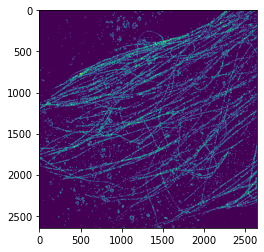

In [20]:
plt.imshow(mask_Hara_stack)

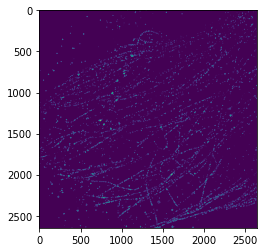

In [24]:
mask_Hara_stack = Hara_stack_fit_predict.reshape((2647,2647))
mask_Hara_stack = np.where(mask_Hara_stack == 3, 1,0)
plt.imshow(mask_Hara_stack)